# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Read Dataset

In [3]:
dataset = pd.read_csv('model_selection.csv')

In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

def transform(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return scaler, X_train, X_test

# Accuracy Metrics

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import defaultdict

def accuracy(models, X_test, y_test):
    acc = dict()
#     print(models)
    for name, model in models.items():
        score = accuracy_score(y_test, model.predict(X_test))
        acc[name] = score
    
    return acc

def cv_accuracy(models, X_train, y_train):
    acc = defaultdict(list)
#     print(models)
    for name, model in models.items():
        score = cross_val_score(model, X=X_train, y=y_train, cv=10)
        acc[name].append(score.mean()*100)
        acc[name].append(score.std()*100)
    
    return acc

# Implementation

In [9]:
_, X_train, X_test = transform(X_train, X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Linear Logistic Regression
lm = LogisticRegression()
lm.fit(X_train, y_train)

# Non Linear Logistic Regress
# pf = PolynomialFeatures(degree=2)
# lr = LogisticRegression()

# X_train_poly = pf.fit_transform(X_train)
# X_test_poly = pf.transform(X_test)

# scaler, X_train_scaled, X_test_scaled = transform(X_train_poly, X_test_poly)

# lr.fit(X_train_scaled, y_train)

# Knn classifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

# SVM linear
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

# SVM Non-linear
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# Naive Bayes
naive = GaussianNB()
naive.fit(X_train, y_train)

# Decison Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Random Forest

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
models = {
    'Logistic Regression': lm,
    'KNN': knn,
    'Linear SVM': linear_svc,
    'SVM': svc,
    'Naive Bayes': naive,
    'Tree': tree,
    'Forest': forest
}

In [12]:
accuracy(models, X_test, y_test)

{'Logistic Regression': 0.9562043795620438,
 'KNN': 0.9562043795620438,
 'Linear SVM': 0.9562043795620438,
 'SVM': 0.9562043795620438,
 'Naive Bayes': 0.948905109489051,
 'Tree': 0.9416058394160584,
 'Forest': 0.9708029197080292}

In [13]:
cv_accuracy(models, X, y)

defaultdict(list,
            {'Logistic Regression': [96.78815004262574, 2.5044947381092406],
             'KNN': [97.22719522591646, 2.6357992860835116],
             'Linear SVM': [96.64109121909632, 2.158104936312061],
             'SVM': [97.0780051150895, 2.1569522488833974],
             'Naive Bayes': [96.05498721227622, 1.8366070726154708],
             'Tree': [95.02557544757032, 1.980703338893754],
             'Forest': [96.93307757885762, 1.7725456594854991]})

In [14]:
y_pred = knn.predict(X_test)

# CAP Curve

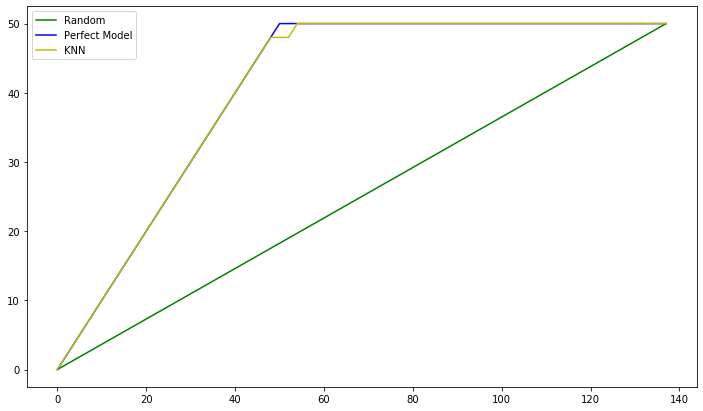

In [15]:
total = len(y_test)
one_count = np.sum(y_test)
zero_count = total - one_count

y_sort = [y for _, y in sorted(zip(y_pred, y_test), reverse=True)]

x = np.arange(0, total+1)

y_plot = np.append([0], np.cumsum(y_sort))

plt.figure(figsize=(12,7))
plt.plot([0, total], [0, one_count], 'g', label='Random')
plt.plot([0, one_count, total], [0, one_count, one_count], 'b', label='Perfect Model')
plt.plot(x, y_plot, 'y', label='KNN')
plt.legend()

# ROC AUC Curve

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, lm.predict_proba(X_test)[:, 1])

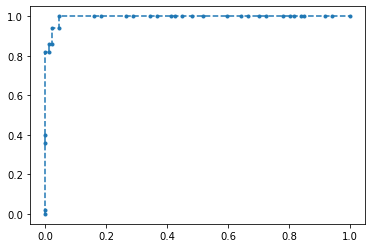

In [17]:
plt.plot(fpr, tpr, ls='--', marker='.')

In [18]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01149425, 0.01149425, 0.02298851, 0.02298851, 0.04597701,
       0.04597701, 0.16091954, 0.18390805, 0.26436782, 0.28735632,
       0.34482759, 0.36781609, 0.4137931 , 0.42528736, 0.44827586,
       0.48275862, 0.51724138, 0.59770115, 0.64367816, 0.66666667,
       0.70114943, 0.72413793, 0.7816092 , 0.8045977 , 0.81609195,
       0.83908046, 0.85057471, 0.91954023, 0.94252874, 1.        ])

In [19]:
threshold

array([1.99999645e+00, 9.99996454e-01, 9.98356067e-01, 9.98225083e-01,
       9.54977027e-01, 9.21936460e-01, 8.20377720e-01, 7.52661076e-01,
       5.86519149e-01, 4.25121678e-01, 3.02001842e-01, 1.98564158e-02,
       1.97751398e-02, 1.34182523e-02, 1.32871576e-02, 9.52126918e-03,
       9.05808994e-03, 8.87158830e-03, 7.58861971e-03, 7.54959990e-03,
       7.21095747e-03, 6.03931645e-03, 5.97663431e-03, 4.94985267e-03,
       4.75485944e-03, 4.18352142e-03, 4.02252032e-03, 3.93928643e-03,
       3.22414765e-03, 3.19893010e-03, 3.13268432e-03, 2.67740785e-03,
       2.64952600e-03, 2.31232517e-03, 1.78129041e-03])

In [20]:
roc_auc_score(y_test, lm.predict_proba(X_test)[:, 1])

0.9949425287356322